<a href="https://colab.research.google.com/github/JM1Facundo/JM1Facundo/blob/main/trabajo_practico_02_Amarilla_JM_Facundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install gdown

In [74]:
import gdown
url = 'https://drive.google.com/file/d/1O7a2SwL2OQ30Eb-BFVzjAC-6fVUxdTwS/view?usp=sharing'

gdown.download(url, 'titanic.csv', quiet=False)

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1O7a2SwL2OQ30Eb-BFVzjAC-6fVUxdTwS
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1O7a2SwL2OQ30Eb-BFVzjAC-6fVUxdTwS/view?usp=sharing
To: /content/titanic.csv
91.4kB [00:00, 7.30MB/s]


'titanic.csv'

In [17]:
!ls -1

sample_data
titanic.csv


In [35]:
!wget -O/content/titanic.csv "https://drive.google.com/file/d/1O7a2SwL2OQ30Eb-BFVzjAC-6fVUxdTwS/view?usp=sharing"

--2024-10-24 17:43:36--  https://drive.google.com/file/d/1O7a2SwL2OQ30Eb-BFVzjAC-6fVUxdTwS/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 172.217.0.78, 2607:f8b0:4025:810::200e
Connecting to drive.google.com (drive.google.com)|172.217.0.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/titanic.csv’

/content/titanic.cs     [ <=>                ]  90.73K  --.-KB/s    in 0.02s   

2024-10-24 17:43:36 (4.72 MB/s) - ‘/content/titanic.csv’ saved [92903]



In [43]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
import pandas as pd
import os

file_path = '/content/drive/MyDrive/titanic.csv'
df = pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
# OK, VAMOS A TENER EN TOTAL 12 COLUMNAS:
# 1[Id Pasajero]- 2[Sobrevio?]- 3[PClass]- 4[Name] -5[Sex] -6[Edad]- 7[SibSp]- 8[Parch]- 9[Ticket]- 10[Fare/Tarif]- 11[Cabina]- 12[Embarked]


# CONSINGA N2.
# Vemos si ordena y enumera segun consinga.
df_sorted = df.sort_values(by=['Pclass', 'Name'])
df_sorted['Index'] = df_sorted.groupby('Pclass').cumcount()

resultado = df_sorted[['Pclass', 'Name']]
print(resultado)

     Pclass                                             Name
730       1                    Allen, Miss. Elisabeth Walton
305       1                   Allison, Master. Hudson Trevor
297       1                     Allison, Miss. Helen Loraine
498       1  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
460       1                              Anderson, Mr. Harry
..      ...                                              ...
559       3     de Messemaeker, Mrs. Guillaume Joseph (Emma)
286       3                          de Mulder, Mr. Theodore
282       3                        de Pelsmaeker, Mr. Alfons
153       3                  van Billiard, Mr. Austin Blyler
868       3                      van Melkebeke, Mr. Philemon

[891 rows x 2 columns]


In [49]:
# CONSIGNA N3.
# Podemos usar varias formas de obtener el porcentaje. Elegimos una:
porcentaje_sobrevivientes = df['Survived'].value_counts(normalize=True) * 100
porcentaje_sobrevivientes.index = ['Murieron', 'Sobrevivieron']
print(porcentaje_sobrevivientes)


Murieron         61.616162
Sobrevivieron    38.383838
Name: proportion, dtype: float64


In [50]:
# IDEM
porcentaje_sobrevivientes = porcentaje_sobrevivientes.round(2)
for index, value in porcentaje_sobrevivientes.items():
    print(f"{index}: {value}%")



Murieron: 61.62%
Sobrevivieron: 38.38%


In [51]:
# CONSINGA N4.
sobrevivientes_por_clase = df.groupby('Pclass')['Survived'].mean() * 100
sobrevivientes_por_clase = sobrevivientes_por_clase.round(2)
print(sobrevivientes_por_clase)

Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64


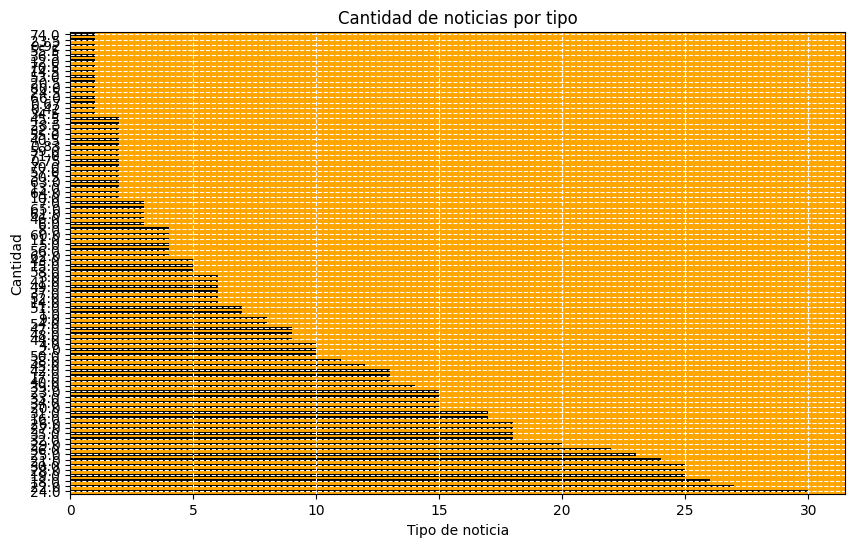

In [67]:
# CONSIGNA N5.
import matplotlib.pyplot as plt
import seaborn as sns

noticias = df['Age'].value_counts()

plt.figure(figsize=(10, 6))
noticias.plot(kind='barh', color='black')
plt.title('Cantidad de noticias por tipo', color='black')
plt.xlabel('Tipo de noticia', color='black')
plt.ylabel('Cantidad', color='black')
plt.xticks(color='black')
plt.gca().set_facecolor('orange')
plt.grid(True, linestyle='--', color='white')
plt.show()

In [66]:
!wget -O/content/df_total.csv "https://drive.google.com/file/d/1lQv5L0uF7Gu4miEiQaxEMP2JHDLPHKIc/view"

file_path = '/content/df_total.csv'


--2024-10-24 19:31:12--  https://drive.google.com/file/d/1lQv5L0uF7Gu4miEiQaxEMP2JHDLPHKIc/view
Resolving drive.google.com (drive.google.com)... 172.217.164.14, 2607:f8b0:4025:803::200e
Connecting to drive.google.com (drive.google.com)|172.217.164.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/df_total.csv’

/content/df_total.c     [ <=>                ]  90.53K  --.-KB/s    in 0.02s   

2024-10-24 19:31:13 (4.63 MB/s) - ‘/content/df_total.csv’ saved [92707]



In [77]:
from google.colab import files

# Esto abrirá un diálogo para seleccionar y subir el archivo
uploaded = files.upload()

# Ahora puedes leer el archivo subido
import pandas as pd
import io

df2 = pd.read_csv(io.BytesIO(uploaded[' ']))

Saving df_total.csv to df_total.csv


In [78]:
!ls -1


df_total.csv
drive
sample_data
titanic.csv


In [79]:
df2 = pd.read_csv('df_total.csv')
df2.head()

,url,news,Type
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra


In [81]:
# CONSIGNA N2_EJERCICIO 2
import re

def buscar_persona(texto):
  nombres = re.findall(r'([A-Z][a-z]+(?: [A-Z][a-z]+)*)', texto)
  return nombres[0] if nombres else None

df2['person'] = df2['news'].apply(buscar_persona)
df2.head()

,url,news,Type,person
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra,Durante
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones,El
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas,En
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia,Con
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra,Ayer


In [82]:
# CONSIGNA N3_EJERCICIO 2
def obtener_dominio(url):
  try:
    resultado = urlparse(url)
    dominio = '{uri.netloc}'.format(uri=resultado)
    return dominio
  except:
    return None

df2['dominio'] = df2['url'].apply(obtener_dominio)
df2.head()

,url,news,Type,person,dominio
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra,Durante,None
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones,El,None
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas,En,None
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia,Con,None
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra,Ayer,None


In [84]:
def contar_palabras(texto):
  if isinstance(texto, str):
     return len(texto.split())
  return 0

df2['cantidad_palabras'] = df2['news'].apply(contar_palabras)
df2.head()

,url,news,Type,person,dominio,cantidad_palabras
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra,Durante,None,221
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones,El,None,342
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas,En,None,367
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia,Con,None,477
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra,Ayer,None,793


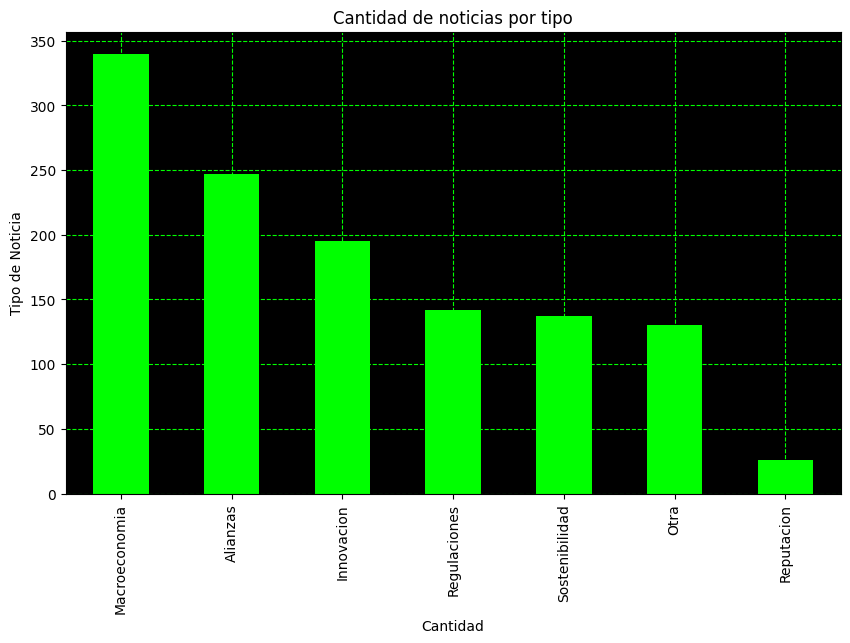

In [91]:
noti = df2['Type'].value_counts()

plt.figure(figsize=(10, 6))
noti.plot(kind='bar', color='#00FF00')
plt.title('Cantidad de noticias por tipo', color='black')
plt.xlabel('Cantidad', color='black')
plt.ylabel('Tipo de Noticia', color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.gca().set_facecolor('black')
plt.grid(True, linestyle='--', color='#00FF00')
plt.show()
#